In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


Epoch 1/1000
211/211 [==============================] - 1s 4ms/step - loss: 7371.0146 - val_loss: 615.3227
Epoch 2/1000
211/211 [==============================] - 1s 3ms/step - loss: 371.2924 - val_loss: 245.8472
Epoch 3/1000
211/211 [==============================] - 1s 4ms/step - loss: 163.7191 - val_loss: 188.0535
Epoch 4/1000
211/211 [==============================] - 1s 4ms/step - loss: 123.9302 - val_loss: 171.2763
Epoch 5/1000
211/211 [==============================] - 1s 4ms/step - loss: 98.8947 - val_loss: 150.6012
Epoch 6/1000
211/211 [==============================] - 1s 4ms/step - loss: 82.3493 - val_loss: 129.6164
Epoch 7/1000
211/211 [==============================] - 1s 4ms/step - loss: 71.0432 - val_loss: 131.5679
Epoch 8/1000
211/211 [==============================] - 1s 3ms/step - loss: 64.0993 - val_loss: 139.2949
Epoch 9/1000
211/211 [==============================] - 1s 3ms/step - loss: 57.8962 - val_loss: 149.8500
Epoch 10/1000
211/211 [===========================

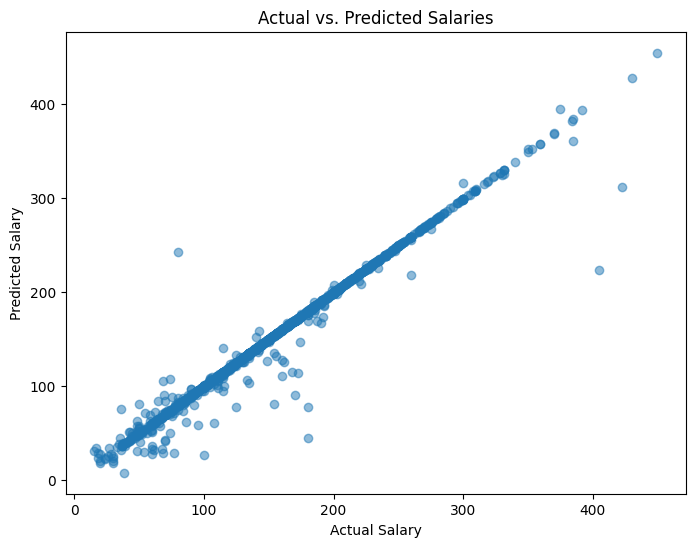

Mean Absolute Error: 1.9433192897859832
Mean Squared Error: 89.75144705489365
Root Mean Squared Error: 9.473724033076625
Top 10 Features: Index(['job_title_Cloud Database Engineer',
       'job_title_Marketing Data Engineer', 'job_title_Data Science Director',
       'job_title_Data Lead', 'job_title_Deep Learning Researcher',
       'job_title_Data Manager', 'job_title_Deep Learning Engineer',
       'job_title_Big Data Engineer', 'job_title_ETL Developer',
       'job_title_Director of Data Science'],
      dtype='object')


In [12]:

# Load the data
data = pd.read_csv('jobs_in_data.csv')

# Drop the 'salary_in_usd' column since we're ignoring it
# data.drop(columns=['salary_in_usd'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data)
# Divide the 'salary' column by 1000
data['salary_in_usd'] /= 1000
# Separate features and target
X = data.drop(columns=['salary'])
y = data['salary_in_usd']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     # Dropout(0.2),
#     Dense(64, activation='relu'),
#     # Dropout(0.2),
#     Dense(1, activation='linear')
# ])
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout(0.2),  # Adding dropout regularization
    Dense(64, activation='relu'),
    # Dropout(0.2),  # Adding dropout regularization
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with a custom learning rate
# custom_learning_rate = 0.001  # Set your desired learning rate here
# model.compile(optimizer=Adam(learning_rate=custom_learning_rate), loss='mean_squared_error')
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Feature Importance
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate the importance of features based on the weights
feature_importance = np.mean(np.abs(weights), axis=0)

# Get feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Top 10 features
top_features = feature_names[sorted_indices][:10]
print('Top 10 Features:', top_features)

 2813702912.0 0.001
 2603507200.0 0.01
 3033694464.0 0.1
 2603507017.888839 0.01

 1000 epoch
 2596519395.2590485
root 50956.05356833522
